# Assignment 3 Group 19 Life Expectancy Machine Learning

- Amber Jain 218047883
- Isaac Gleeson 218302635
- Miles Danswan 218188385
- Cedric Quenette 218043304

Presentation link: https://youtu.be/ka5ymukFZA4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.compose import ColumnTransformer


pd.options.mode.chained_assignment = None  # default='warn'
np.set_printoptions(edgeitems=10)
np.core.arrayprint._line_width = 180

# Performing PCA on the Dataset

In [2]:
# load testing version of cleaned dataset
df = pd.read_csv('cleaned_data_Winsorized.csv')

In [3]:
# extract categorical data from the dataset, to use as labels for the set of features
X = df.drop(['Country', 'Status'], axis=1)
Y = df[['Country','Status']]
Cols = X.columns

## Fill NaN / Null Values
Fill any NaN / NUll values, in the case that the dataset version being used is changed, and contains null values.

In [4]:
# replace NaN values with mean
X.fillna(0, axis=1, inplace=True)

In [5]:
'''
Ensure that no values are missing or infinite.
The importance of this is the Scikit Learn PCA class will not fit
data which is infinite or NaN
'''
print(np.any(np.isfinite(X)) == True)
print(np.any(np.isnan(X)) == False)

True
True


## Split the Data (Train/Test)
This was moved to the bottom (Cross Validation). This code was left here as history

In [6]:
# split the dataset into training and testing (this was part 
# of the initial PCA anlysis, however, was moved to end Cross validation)
# TEST_SIZE = 0.15
# X_train, X_test, y_train, y_test = tts(X, y, test_size=TEST_SIZE)

## Standardize the Input. 
With the Standard Scaler, compute the Standardized form of the given Dataset, using fit_transform.

In [7]:
'''
Normalize the numerical data, to ensure that large variance 
between differing features does not effect the outcome
'''
ss = StandardScaler()
# X_train = ss.fit_transform(X_train) # moved to Cross Validation
# X_test = ss.transform(X_test) # moved to Cross Validation
X_ft = ss.fit_transform(X)

## Using PCA to Reduce our Dimentions.

PCA is used to reduce the dimensions in our dataset, by removing low variance components. We begin with the number of PCA components being equal to number of Attributes in the given dataset. This is a good starting point, as it allows us to confirm the execution of PCA ( see inverse transform ), and gather an understanding for how much of the dataset is required to fulfill 90% accuracy in the dataset. Note This accuracy target ( 90% ) is arbitrary. However, 90% is a good starting target.

In [8]:
'''
Calculate the principal components of the dataset. This allows for Machine Learning 
techniques to be completed with only the components which contribute to the majority of the variance
'''
components = X.shape[1]
pca = PCA(n_components=components)
# X_train = pca.fit_transform(X_train) # moved to Cross Validation
# X_test = pca.transform(X_test) # moved to Cross Validation
X_ft = pca.fit_transform(X_ft)

## Initial PCA Results

The initial PCA results show degree and direction of variance with respect to the containing Principal Component.

We can observe that the further along the Attribute axis we go, the smaller the degree and direction of variance is. This outlines the purpose of PCA. We wish to reduce the number of features being used, to improve the performance of our Models, whilst targetting minimal loss in accuracy

In [9]:
X_pca_df = pd.DataFrame(data=X_ft, 
                        columns=['PC%d' % (i+1) for i in range(components)])
X_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,4.423623,0.325759,2.206757,0.581188,-0.263415,1.665826,-0.357197,2.215663,0.195130,1.272150,0.188048,0.167566,1.114054,0.891802,0.107487,-0.182646,-0.365416,0.028935,0.071313,-0.063725
1,4.428390,0.231274,1.483009,0.310950,-0.481306,1.588508,-0.584436,2.177970,0.138854,0.971994,0.369297,0.825696,1.096428,0.890197,0.122935,-0.426203,0.120544,-0.243442,0.103162,-0.078717
2,4.340914,0.088074,1.659083,0.375984,-0.409749,1.307093,-0.061691,2.027027,-0.048668,0.824016,0.340739,0.951995,1.047627,0.856516,0.149290,-0.392568,0.187423,-0.255900,0.098664,-0.075742
3,4.392715,0.012407,1.894289,0.431760,-0.665198,0.813492,-0.835123,2.134678,0.019086,1.069361,-0.089217,0.344562,1.004130,0.800004,0.079911,-0.430250,0.265119,-0.262743,0.094260,-0.075841
4,4.506252,-0.130163,1.832226,0.416695,-0.483863,0.600310,-0.877484,1.912452,0.116238,0.977479,-0.109806,0.361672,0.927927,0.849330,0.172101,-0.382355,0.255990,-0.287866,0.096727,-0.076212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,4.547718,0.642336,-1.502280,-0.204806,-1.578880,-0.141593,0.878566,-0.082750,-0.189455,0.797116,0.057439,1.089440,0.019131,0.123116,0.545989,-0.452579,0.312898,-0.211053,0.018024,0.193491
2934,5.324844,1.972277,-0.620631,-0.351221,-0.900864,-0.480068,0.207850,0.221947,0.663828,1.187602,-1.160729,-0.129513,-0.063467,-0.083466,0.215219,-0.614016,-0.565820,-0.365532,0.012915,0.202132
2935,2.576899,1.329121,-1.409210,1.460739,-0.244602,-0.596702,-0.434245,-0.616938,-1.045099,-0.657017,0.833957,-0.609751,-1.044370,-1.230980,0.400816,-1.160713,0.394691,-0.454906,-0.009368,0.204049
2936,3.492954,0.998748,-1.428756,1.299524,-1.137017,-0.771340,-0.257004,-1.756984,-0.935158,0.015536,-1.127768,-0.549373,0.456747,-0.550662,0.496284,-0.723377,0.204827,-0.205060,0.007467,0.191438


## Principal Component Variance Contribution
We want to know how many of the resulting Principal Components satisfy our accuracy target of ( _90%_ ). To find this, we calculate the cummulative sum of the Explained Variance Ratio. The Explained Variance Ratio provides a number representing the proportion of which each principal component contributes variance to the overall dataset.

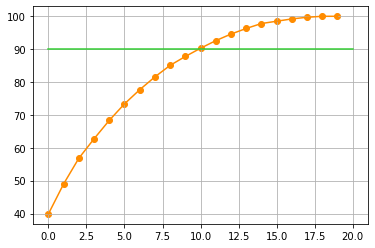

In [10]:
'''
Display the cumulative sum of the explained variance for each 
Principal Component
'''
clrs = np.array(['darkorange', 'limegreen', 'royalblue'])

pca_expln_var_len = len(pca.explained_variance_ratio_)
pca_cum_sum = np.cumsum(np.round(pca.explained_variance_ratio_, 
                                 decimals=3)*100)
plt.scatter(np.arange(0, pca_expln_var_len), 
            pca_cum_sum, 
            c=clrs[0])
plt.plot(pca_cum_sum,
         c=clrs[0])
plt.plot([0, 
          pca_expln_var_len], 
         [90, 90], 
         c=clrs[1])
plt.grid()
plt.savefig('../PCA Results (Cumulative Sum).png')

## Variance Contribution Analysis Results
As can be seen above, only __half__ of the Principal Components are required to retrieve 90% of the overall dataset variance. This is a large improvement over the previous 20 components, and will help improve the spedd of our future ML models (if applied).

## Developing vs Developed Variance
We can visualise the contribution of Developing vs Developed data points, with respect to the First and Second Principal Components. 

This allows us to understand the degree of variance of Developed and Developing, and allows us to visually gather the clusters of developing vs developed. For example, with developed, we can use this information to cluster new data points.

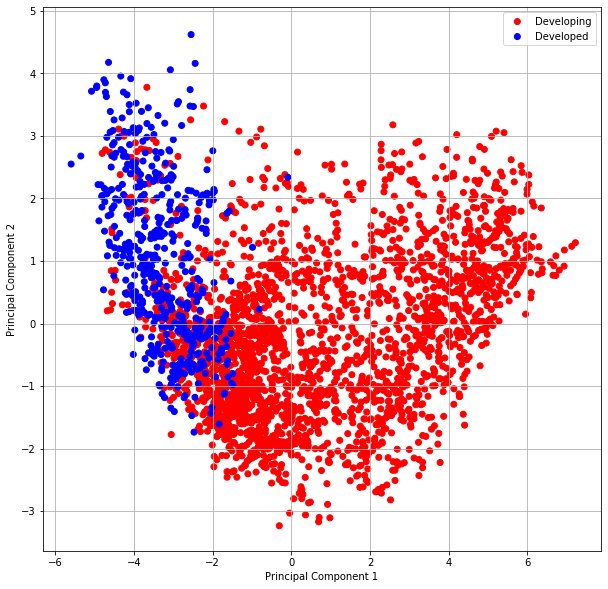

In [11]:
'''
Display the Prinicpal Components in relation to the invidual contribution
of each data point, relative to their classification of 'Developing' or 'Developed'
'''
developing = df.loc[df["Status"] == 'Developing']
developed = df.loc[df["Status"] == 'Developed']

clrs = np.array(['r', 'b'])

developing.replace({"Status": {"Developing": 0, "Developed": 1}}, inplace=True)
developed.replace({"Status": {"Developing": 0, "Developed": 1}}, inplace=True)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.scatter(X_pca_df.loc[developing.index.values, 'PC1'], 
                          X_pca_df.loc[developing.index.values, 'PC2'], 
                          c = clrs[developing['Status'].values], 
                          label='Developing')

ax.scatter(X_pca_df.loc[developed.index.values, 'PC1'], 
                          X_pca_df.loc[developed.index.values, 'PC2'], 
                          c = clrs[developed['Status'].values], 
                          label='Developed')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.grid()
ax.legend()

fig.savefig("../PCA Results (Developing vs Developed).png")

## Directions and Degree of each Feature
This example shows the degree and direction of each feature, relative to the First and Second Principle Component. The importance of this visualisation is to gather how each original feature affects the level of variance in terms of the First two PCs.

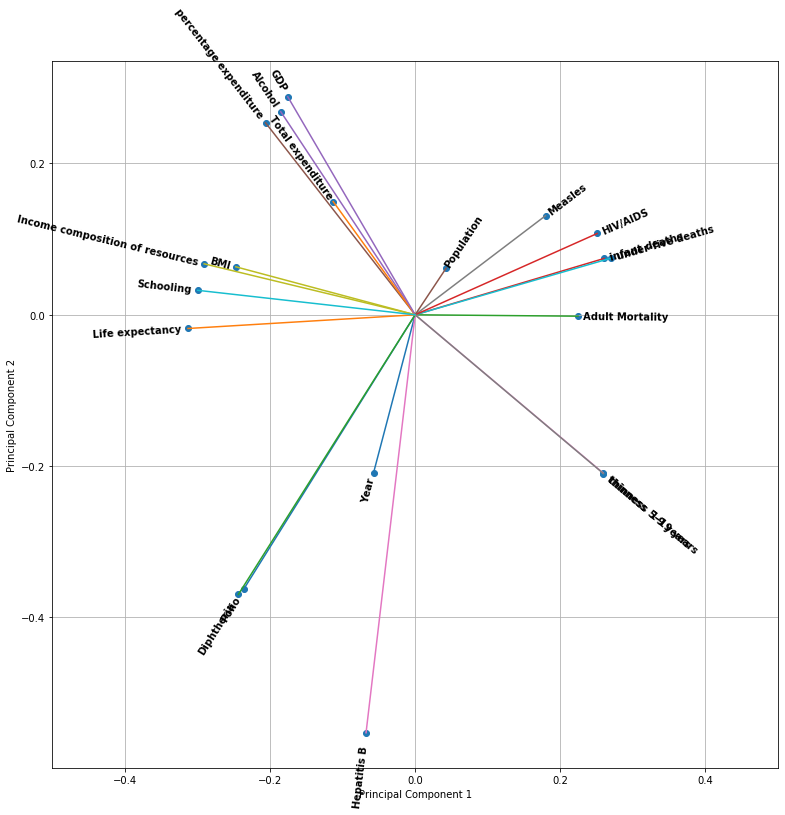

In [12]:
'''
Display the degree of contribution of each attribute in terms of
the First and Second Primary Principal Components 
'''
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111)
ax.grid()
ax.set_xlim([-0.5,0.5])
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.scatter(pca.components_[0], 
           pca.components_[1])

'''
Enumerate all columns, plotting the line and text associated 
with the degree of that line
'''
for idx, val in enumerate(Cols[0:components]):
    x, y = pca.components_[0][idx], pca.components_[1][idx]
    xy_arr = np.array([x, y])
    ax.plot([0, x], 
            [0, y])
    a = (y/x) # linear equation (a)
    pos_x = x+(x/100 * 3) # text x position offset from x/y point
    pos_y = a*(pos_x) # text y position
    p1, p2, = ax.transData.transform_point((0, 0)), ax.transData.transform_point((pos_x, pos_y)) # transform given pos_x and pos_y into axis points
    dx, dy = (p2[1] - p1[1]), (p2[0] - p1[0]) # delta x and y
    angle = np.degrees(np.arctan(dx / dy)) # calculate the angle of the text relative to the associated line
    ax.text(pos_x, 
            pos_y, 
            val, 
            ha='left' if x > 0 else 'right', # ensure that negative and positive values are anchored correctly
            va='center', 
            weight='bold',
            fontsize=10,
            rotation=angle, 
            rotation_mode='anchor')
    
fig.savefig('../PCA Results (Column Contribution to First and Second PCs).png')

## Developing vs Developed Results
The above shows that several features exhibit a high positive degree of variance in terms of the First and Second Component:
 * Measles
 * HIV/AIDS
 * Infant Deaths / Under Five Deaths

## PCA Inverse Transform and Recovering Data
In this step, we reevaluate PCA with half of the original feature space. The goal of this task is to show how the reduction of components from the original dataset, results in loss of informtion, with respect to the decrease in compute time.

In [13]:
'''
Now that we know we can reduce our Dimensionality to 10 features,
to achieve 90% of explained variance, we will reconstruct the PCA model,
and project the results back onto the original features space
'''
components = 10
ss = StandardScaler()
X_ft = ss.fit_transform(X)
pca = PCA(n_components=components)
X_ft = pca.fit_transform(X_ft)

# set pandas to display floating point numbers rounded to 1 decimal place
pd.set_option('display.float_format', 
              lambda x: '%.1f' % x)
# inverse the projection into the original feature space
proj_original = pca.inverse_transform(X_ft)
# scale back the projected result
scaled_proj_original = ss.inverse_transform(proj_original)
sc_proj_original_df = pd.DataFrame(scaled_proj_original[:, 0:len(Cols)], 
                                   columns=Cols[0:len(Cols)])
# calculate the loss for each feature after projection (loss is inevitable when executing 
# dimensionality reduction, as to remove dimensions, data must also be removed (hence, less accuracy). 
# The purpose of removing dimension`s is to maximise the trade off between algorithm compute efficiency
# and maximizing explained variance throughout the dataset)
sc_proj_original_loss = ((X-sc_proj_original_df[Cols[0:components].values]) ** 2)
print(sc_proj_original_loss.mean())

Adult Mortality                    2947.5
Alcohol                               2.9
BMI                                  87.4
Diphtheria                            nan
GDP                                   nan
HIV/AIDS                              nan
Hepatitis B                         119.4
Income composition of resources       nan
Life expectancy                       9.8
Measles                           21937.4
Polio                                 nan
Population                            nan
Schooling                             nan
Total expenditure                     nan
Year                                  0.7
infant deaths                        22.8
percentage expenditure            16118.5
thinness  1-19 years                  nan
thinness 5-9 years                    nan
under-five deaths                    32.2
dtype: float64


## Custom PCA ML Testing Function and Example
Below is a custom PCA ML function for Cross Validating the use of PCA with the given _n_ components. This shows the accuracy flctuation and the scores of each Validation.

The example is simple, and provides a guide for those that may want to use it. 

Binning and classifying Life Expectancy, and correctly classifying Test data. The resulting score shows an _error_ , which is satisfactory if equal to __0__. Changing the number of bins in the main factor here, and it can be seen that when chanign the number of PCA components in the evaluation, the smaller the number, the smaller the error. This implies that more data is complicating this classification task, and hence, more of the features can be removed.

In [14]:
'''
Apply PCA to a given AI/ML Model

This function takes a Model, Cross Validator, and and X/Y dataset.
The Model is applied with Cross Validator to the X and Y dataset

The function return the scores for 'accuracy' of the Model for each 
Cross Validator partition

Note: this function has context within this notebook. Executing with defaults will
raise an error if called outside of this notebook!
Note: If the model parameter is changed, the scoring method must also be changed! (i.e. classification has it's
own scoring methods, so does regression) Please see https://scikit-learn.org/stable/modules/model_evaluation.html
for more info
'''
def pca_ml_test(X, 
                Y, 
                model=LinearRegression(), 
                scoring='neg_mean_absolute_error',
                cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1), 
                pca_components=X.shape[1]):
    
    stps = [('scale', StandardScaler()),
            ('pca', PCA(n_components=pca_components-1)), 
            ('lr', model)] # create pipe for steps in evaluating PCA with ML model
    model = Pipeline(steps=stps) # create Pipeline for above steps
    scores = cross_val_score(model, 
                               X, 
                               Y, 
                               scoring=scoring, 
                               cv=cv) # evaluation Model with PCA Component influence
    
    print('Score: %.3f (%.3f)' % (np.mean(scores), np.std(scores))) # print the average and standard deviation of the Cross Validation Evaluation
    return scores

'''
Example use of PCA results to classify the Life Expectancy into
50 individual bins between -1, 50
'''
X_new = X.copy(deep=True).drop(['Life expectancy'], axis=1) # copy the original X array without Life Expectancy (Target)
life_exp_int = df['Life expectancy'].astype(int) # bin Life Expectancy data into 

res = pd.cut(df['Life expectancy'], bins=np.arange(-1, 50), labels=np.arange(0, 50))
res.fillna(0, inplace=True) # fill any NaN values from the above binning (-inf, inf)

# returns the scores of each Cross Validation Run with respect to the
# provided 'scoring' metric (which in the above example's case, is 'neg_mean_absolute_error')
scrs = pca_ml_test(X_new, 
                   res.values, 
                   pca_components=10)

Score: -3.687 (0.335)


# Status Logistic Regression Using PCA

In [77]:
# Reading in the file
data = pd.read_csv("cleaned_data_Winsorized.csv")

df_reduced = data.drop(['Country', 'Year', 'Status', 'GDP', 'Population', 'Diphtheria', 'Polio', 'thinness  1-19 years', 'thinness 5-9 years', 'Hepatitis B'] , axis=1)
df_reduced

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,Income composition of resources,Schooling
0,65.0,263.0,52,0.0,71.3,741,19.1,61,8.2,0.1,0.5,10.1
1,59.9,271.0,52,0.0,73.5,492,18.6,61,8.2,0.1,0.5,10.0
2,59.9,268.0,52,0.0,73.2,430,18.1,61,8.1,0.1,0.5,9.9
3,59.5,272.0,52,0.0,78.2,741,17.6,61,8.5,0.1,0.5,9.8
4,59.2,275.0,52,0.0,7.1,741,17.2,61,7.9,0.1,0.5,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2933,45.6,411.0,27,4.4,0.0,31,27.1,42,7.1,1.5,0.4,9.2
2934,45.6,411.0,26,4.1,0.0,741,26.7,41,6.5,1.5,0.4,9.5
2935,45.6,73.0,25,4.4,0.0,304,26.3,40,6.5,1.5,0.4,10.0
2936,45.6,411.0,25,1.7,0.0,529,25.9,39,6.2,1.5,0.4,9.8


## Encoding the label
We encode Status because it is categorical.

In [63]:
# Encoding status 
status_encoded = []
status = data.Status
le = preprocessing.LabelEncoder()
status_encoded=le.fit_transform(status)

## Assigning Variables

We assign the features to X and the label (Status) to y.

In [64]:
# Embedding features (X) and the label (y) which is the status of countries
X = df_reduced
y = status_encoded

# Decompostion of data

Standardised the train and test features. Fit them into the PCA with the number of columns as the number of components (12).

In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# We standardised our dataset features and transform them
ss_train = StandardScaler()
X_ft = ss_train.fit_transform(X)

# We fit the model with the number of components equal to the number of features in the dataset
PCA_results = PCA(n_components=X_ft.shape[1])
PCA_results.fit(X_ft)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# Calculating the Cummulative Sum of Each Principle Component

We take the results of the model, extract the explained variance ratio (which means each individual column collated together explained as a ratio compared to the rest of the components). We express this as a percentage. The result obtained is the cummulative percentage variance each component has on the dataset. The components are ordered such that the first component has the highest variance on the dataset, the second component has the second highest variance, etc. The first explained variance ratio is the percentage variance the first component has on the dataset, the second explained variance ratio is the percentage variance of the *first + second* component on the dataset, the third is first + second + third etc. 

In [66]:
pca_cum_sum = np.cumsum(np.round(PCA_results.explained_variance_ratio_,decimals=3)*100)
print(pca_cum_sum)

[49.  60.2 69.9 76.8 82.  86.7 90.9 94.6 97.6 98.8 99.7 99.8]


# Results Explained

49 is the explained variance ratio expressed as a percentage of the first component on the dataset. 60.2 is the explained variance ratio expressed as a percentage of the first + second component on the dataset etc. We can see that just the first 7 components explain over 90% of the variance in the dataset, meaning that the following 5 components explain only less than 10% of the variance in the dataset. This means that we can safely ommit 5 components without impacting our results significantly (the number of components ommitted depend on the target accuracy). This allows us to reduce the dimensionality used in our other model. The benefits of reducing dimensionality are:
- Faster training and testing of the the model due to less features used
- Testing with a new dataset reduces the need for complete data as fewer features need to be gathered
- Simplicity in making inferences based on models as less features have to be accounted for in analysis

# Running PCA with 7 Components

We have seen that the first 7 components account for 90.9% of the variance in the dataset. We will run the PCA again with that 7 components to see if we get a consistent result.

In [67]:
# The first PCA used all the components in the dataset, we have reduced the number of components to 7
# Based on the results of the previous PCA showing that the first 7 components account for 90.9% of variance
PCA_results_reduced = PCA(n_components=7)
# Fitting the training data into the PCA model
PCA_results_reduced.fit(X_ft)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# Transforming the Reduced PCA Results

In [68]:
# Transforming the results and adding them to a dataframe for easy viewing
PCA_transformed_reduced = PCA_results_reduced.transform(X_ft)
PCA_transformed_reduced_df = pd.DataFrame(PCA_transformed_reduced)
PCA_transformed_reduced_df

,0,1,2,3,4,5,6
0,2.9,2.2,0.2,-1.5,0.3,-0.2,-0.1
1,3.0,1.6,0.4,-1.5,0.3,-0.4,0.6
2,3.0,1.5,0.3,-1.5,0.3,-0.4,0.7
3,3.2,2.1,0.5,-1.5,0.4,-0.3,-0.1
4,3.3,2.0,0.2,-1.4,0.2,-0.2,-0.1
...,...,...,...,...,...,...,...
2933,3.6,-1.5,2.0,-0.1,-0.4,-0.9,0.5
2934,4.1,-0.2,1.7,0.3,-0.5,-0.5,-1.4
2935,2.9,-0.4,0.8,-0.6,0.3,0.4,0.0
2936,4.1,-0.7,1.3,0.2,-0.3,-0.8,-0.8


# Calculating the Cummulative Sum of Each Principle Component

We can see the same result as above with the sum of the first 5 explained variance ratio as a percentage accounting for 90.9% of the variance in the dataset.

In [69]:
pca_reduced_cum_sum = np.cumsum(np.round(PCA_results_reduced.explained_variance_ratio_,decimals=3)*100)
print(pca_reduced_cum_sum)

[49.  60.2 69.9 76.8 82.  86.7 90.9]


# Logistic Regression Using PCA

We then use the transformed PCA dataset as the features to train our model. The label is the encoded list of country Status.

In [70]:
# Splitting the features and label into a training and testing split
# PCA_transformed_reduced_df = features from PCA
# y = label (list of country statuses)
X_train,X_test,y_train,y_test = train_test_split(PCA_transformed_reduced_df,y,test_size=0.25,random_state=0)

# Creating the model
logistic_regression= LogisticRegression()
# Training the model
logistic_regression.fit(X_train,y_train)
# Predicting the labels of our test features
y_pred=logistic_regression.predict(X_test)

## Evaluating Logistic Regression Model

After splitting the data and training the model, we have to evaluate its performance. In other words, we have to see whether the model was able to take the selected features and use them to make accurate predictions on whether a country is developed or developing in the test set.

We build a confusion matrix showing us the results of the model testing. We compare the predicted labels with the test labels, meaning the predicted statuses and test statuses of countries. 

The confusion matrix shows us:
- TP (True Positive) (predicted developed, actually developed)
- TN (True Negative) (predicted developing, actually developing)
- FP (False Positive) (predicted developed, actually developing)
- FN (False Negative) (predicted developing, actually developed)

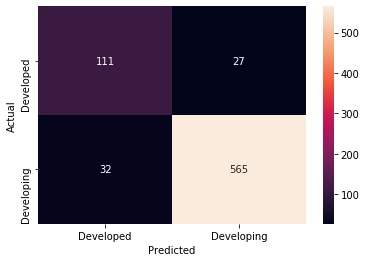

In [71]:
# Creating confusion matrix showing True Positives, True Negatives, False Positives, False Negatives
# To get the labels as Developing and Developed on the confusion matrix, we have to first decode the y_test and y_pred

y_test_decoded = []
y_pred_decoded = []

# We append zeros as developed and ones as developing to new lists
# Some keys are not in use, hence the exception handling
for i in range(data.shape[0]):
    try:
        if (y_test[i] == 0):
            y_test_decoded.append("Developed")
        elif (y_test[i] == 1):
            y_test_decoded.append("Developing")
    except:
        continue

for i in range(data.shape[0]):
    try:
        if (y_pred[i] == 0):
            y_pred_decoded.append("Developed")
        elif (y_pred[i] == 1):
            y_pred_decoded.append("Developing")
    except:
        continue

# We then create a data dictionary based on our decoded data
confusion_data = {'y_test': y_test_decoded,
                  'y_pred': y_pred_decoded
                  }

# We make the dictionary into a dataframe which will be used by our confusion matrix
df = pd.DataFrame(confusion_data, columns=['y_test','y_pred'])

# We then create a confusion matrix between y_test (the actual labels) and y_pred (the predicted labels)
# This shows us the true positives, true negatives, false positives and false negatives
confusion_matrix = pd.crosstab(df['y_test'], df['y_pred'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='g')

plt.show()

True Positives: 111

True Negatives: 565

False Positives: 32

False Negatives: 27

These results make sense as most of the countries are developing, and the highest result is predicting developing and the country is actually developing.

In [72]:
# Determining accuracy of our model using accuracy score between the test labels and the predicted labels
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9197278911564626


# Validating using K-fold Cross Validation

Rather than trying out just one score and validation, this divides the entire dataset into a specific slots, and then iterates through each slot while keeping it as the test and rest of them as training data set. The final score is calcuated using the mean() method thus providing a refined and tested accuracy score. 

In [73]:
score = cross_val_score(logistic_regression, PCA_transformed_reduced_df, y, cv = 6)

In [74]:
score

array([0.91632653, 0.87142857, 0.90816327, 0.96938776, 0.88957055,
       0.95092025])

In [75]:
score.mean()

0.9176328199991654

We obtain a similarly high accuracy score for this method of validation which confirms the validity of our model.

# Life Expectancy Linear Regression

In [76]:
np.set_printoptions(edgeitems=10)
np.core.arrayprint._line_width = 180

# Reading in the file
df = pd.read_csv("cleaned_data_Winsorized.csv")

# Continuing from Exploratory Data Analytics

While exploring data in last assignment, we researched on how each feature affects life expectancy. This part explores how well we can predict the life expectancy (target variable) which is a continous variable, using single and multiple attributes of various data types.

We start with a simple Linear Regression model, which aims to predict the life expectancy for the next 15 years (2020-2035) using the available data for Australia.

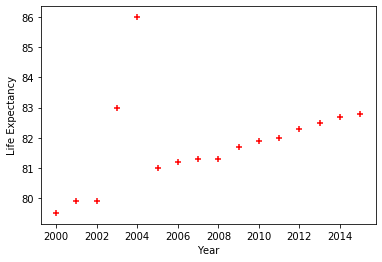

In [36]:
# Plotting to understand the correlation between years and life expectancy of Australia

# Filtering the data
df_1 = df[df["Country"] == "Australia"]
# Putting axes labels
plt.ylabel("Life Expectancy")
plt.xlabel("Year")

# Plotting the graph to check the coorelation between variables
plt.scatter(df_1["Year"],df_1["Life expectancy"],  color = 'red', marker = '+')

In [37]:
# Training the model
reg = LinearRegression()
reg.fit(df_1[["Year"]], df_1["Life expectancy"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Storing prediction for each year into pred_year array
pred_year = []
for i in range(0, 15):
    pred_year.append((reg.predict([[2020 + i]])))

In [39]:
# y = mx + c
# m --
reg.coef_

array([0.12676471])

In [40]:
# c --
reg.intercept_

-172.66764705882315

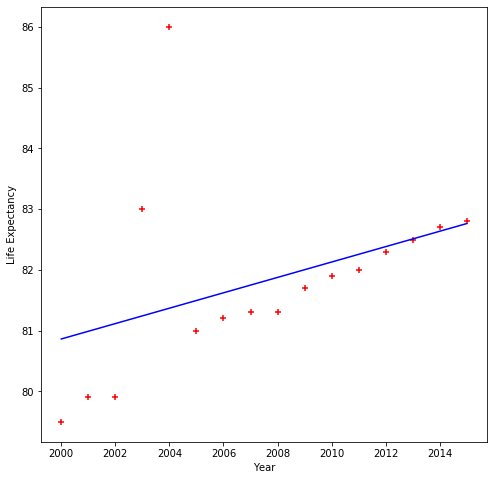

In [41]:
# Visualing the straight line that forms with respect to data
plt.figure(figsize=(8,8))
plt.ylabel("Life Expectancy")
plt.xlabel("Year")

plt.scatter(df_1["Year"],df_1["Life expectancy"],  color = 'red', marker = '+')
plt.plot(df_1.Year, reg.predict(df_1[["Year"]]), color = 'blue')

Australia's predicted life expectancy for the next 15 years based on Year analysis.

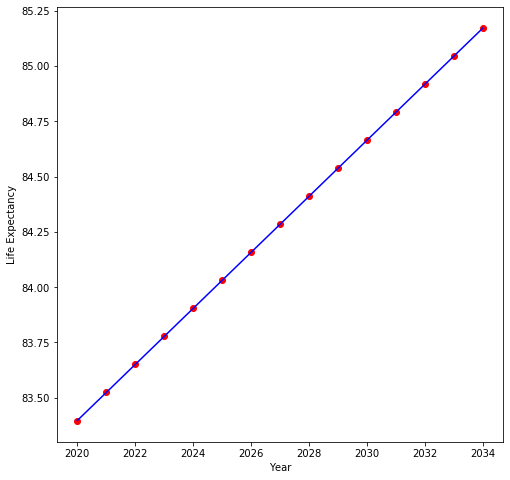

In [42]:
# Predicted Life Expectancy based on straight line in the previous section
plt.figure(figsize=(8,8))
plt.ylabel("Life Expectancy")
plt.xlabel("Year")

plt.scatter([2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034],pred_year,  color = 'red')
plt.plot([2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034],pred_year,  color = 'blue')

# Multivariate Linear Regression using Continuous values
Simple linear regression model based on continuous attributes.

In [43]:
# life_expectancy = (m1 * schooling) + (m2 * perc_expe) + (m3 * under5deaths) + (m4 * income_comp) + b
model_1 = LinearRegression()
# Training the model
model_1.fit(df[["Schooling", "under-five deaths", "percentage expenditure","Income composition of resources"]], df["Life expectancy"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# Value of m1, m2, m3, m4
model_1.coef_

array([ 5.01348594e-01, -1.10838831e-01,  2.00203132e-03,  2.52743946e+01])

In [45]:
# Value of b
model_1.intercept_

48.241552358900336

In [46]:
# Predicting the Life expectancy based on this equation
'''
- Schooling = 10.1
- under-five deaths = 61
- percentage expenditure = 71.3
- Income composition of resources = 0.25

'''
model_1.predict([[10.1,61,71.3,0.25]])

array([53.00534797])

The Life expectancy predicted by the Linear regression model is 53.005 years based on 4 continuous features.

# Nominal and continuous attributes combined

Need to encode column 'Status' which contains information about developing and developed nation so that it can be taken into consideration while deciding upon Life expectancy.

In [47]:
# Need to encode year to use it into prediction
le = LabelEncoder()
dfle = df[["Life expectancy", "Status", "Schooling", "under-five deaths", "percentage expenditure","Income composition of resources"]]
dfle.Status = le.fit_transform(dfle.Status)

In [48]:
X = dfle[["Status", "Schooling", "under-five deaths", "percentage expenditure","Income composition of resources"]].values
X

array([[ 1. , 10.1, 61. , 71.3,  0.5],
       [ 1. , 10. , 61. , 73.5,  0.5],
       [ 1. ,  9.9, 61. , 73.2,  0.5],
       [ 1. ,  9.8, 61. , 78.2,  0.5],
       [ 1. ,  9.5, 61. ,  7.1,  0.5],
       [ 1. ,  9.2, 61. , 79.7,  0.4],
       [ 1. ,  8.9, 61. , 56.8,  0.4],
       [ 1. ,  8.7, 61. , 25.9,  0.4],
       [ 1. ,  8.4, 61. , 10.9,  0.4],
       [ 1. ,  8.1, 61. , 17.2,  0.4],
       ...,
       [ 1. ,  9.9, 45. ,  1. ,  0.4],
       [ 1. ,  9.7, 46. , 20.8,  0.4],
       [ 1. ,  9.6, 46. , 29.8,  0.4],
       [ 1. ,  9.5, 45. , 34.3,  0.4],
       [ 1. ,  9.3, 43. ,  8.7,  0.4],
       [ 1. ,  9.2, 42. ,  0. ,  0.4],
       [ 1. ,  9.5, 41. ,  0. ,  0.4],
       [ 1. , 10. , 40. ,  0. ,  0.4],
       [ 1. ,  9.8, 39. ,  0. ,  0.4],
       [ 1. ,  9.8, 39. ,  0. ,  0.4]])

In [49]:
y = dfle["Life expectancy"].values

In [50]:
ct = ColumnTransformer([("Status", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [51]:
# Dropping first columns
# Why? Because to handle the case where all the inputs are 0 to train the model, so the model will assume that it is either developed or developing
X = X[:,1:]
X

array([[ 1. , 10.1, 61. , 71.3,  0.5],
       [ 1. , 10. , 61. , 73.5,  0.5],
       [ 1. ,  9.9, 61. , 73.2,  0.5],
       [ 1. ,  9.8, 61. , 78.2,  0.5],
       [ 1. ,  9.5, 61. ,  7.1,  0.5],
       [ 1. ,  9.2, 61. , 79.7,  0.4],
       [ 1. ,  8.9, 61. , 56.8,  0.4],
       [ 1. ,  8.7, 61. , 25.9,  0.4],
       [ 1. ,  8.4, 61. , 10.9,  0.4],
       [ 1. ,  8.1, 61. , 17.2,  0.4],
       ...,
       [ 1. ,  9.9, 45. ,  1. ,  0.4],
       [ 1. ,  9.7, 46. , 20.8,  0.4],
       [ 1. ,  9.6, 46. , 29.8,  0.4],
       [ 1. ,  9.5, 45. , 34.3,  0.4],
       [ 1. ,  9.3, 43. ,  8.7,  0.4],
       [ 1. ,  9.2, 42. ,  0. ,  0.4],
       [ 1. ,  9.5, 41. ,  0. ,  0.4],
       [ 1. , 10. , 40. ,  0. ,  0.4],
       [ 1. ,  9.8, 39. ,  0. ,  0.4],
       [ 1. ,  9.8, 39. ,  0. ,  0.4]])

In [52]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# Developed = 0
# Developing = 1
'''
- Developed = 0
- Schooling = 10.1
- under-five deaths = 61
- percentage expenditure = 71.3
- Income composition of resources = 0.25
'''
model.predict([[0, 10.1,61,11.3, 0.25]])

array([55.37178899])

# Validating the data using test_size

In [54]:
# Dividing the data between test and training data
# Testing data = 30%
# Training data = 70 % (Randomly picked)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 0)

In [55]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
model_2.predict(X_test)

array([79.19187466, 61.52610511, 72.6548837 , 58.59708247, 58.72062526,
       62.35657939, 71.57740949, 78.62094917, 72.22703992, 55.62130999,
       ..., 71.60461289, 68.72165694, 71.8556747 , 72.4377131 ,
       66.19050405, 58.89343275, 58.06363596, 65.22578292, 81.37248147,
       71.95226946])

In [57]:
model.score(X_test, y_test)

0.6909386969098185

# Validating using K-fold Cross Validation

Rather than trying out just one score and validation, this divides the entire dataset into a specific slots, and then iterates through each slot while keeping it as the test and rest of them as training data set. The final score is calcuated using the mean() method thus providing a refined and tested accuracy score.

In [58]:
# Cross validation using 6 folds
score = cross_val_score(model_2, X, y, cv = 6)

In [59]:
score

array([0.67632354, 0.59754433, 0.73350535, 0.63885895, 0.79055961,
       0.5732216 ])

In [60]:
score.mean()

0.6683355631007363